# IMDB Movie Exploratory Data Analysis

## Library Importation and Data Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading in data from 2000
tmdbdata2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
tmdbdata2000.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN


In [3]:
#Reading in data from 2001
tmdbdata2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")
tmdbdata2001.head(2)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1180.0,PG-13


In [4]:
#Only needs to be done once

#concatenating data
#results_combined = pd.concat([tmdbdata2000, tmdbdata2001], ignore_index = True)

#loading in dataset
results_combined = pd.read_csv("Data/tmdb_results_combined.csv.gz")

In [5]:
results_combined.duplicated(subset='id').sum()

0

In [6]:
results_combined.drop_duplicates(inplace = True)

results_combined.duplicated(subset = "id").sum()

0

In [7]:
#Only needs to be done once

#Saving data
#results_combined.to_csv('Data/tmdb_results_combined.csv.gz', compression='gzip',index=False)

In [8]:
results_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2916 non-null   object 
 1   adult                  2915 non-null   float64
 2   backdrop_path          1443 non-null   object 
 3   belongs_to_collection  208 non-null    object 
 4   budget                 2915 non-null   float64
 5   genres                 2915 non-null   object 
 6   homepage               224 non-null    object 
 7   id                     2915 non-null   float64
 8   original_language      2915 non-null   object 
 9   original_title         2915 non-null   object 
 10  overview               2857 non-null   object 
 11  popularity             2915 non-null   float64
 12  poster_path            2544 non-null   object 
 13  production_companies   2915 non-null   object 
 14  production_countries   2915 non-null   object 
 15  rele

## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [9]:
results_combined 

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.00,0.0,NaN
2912,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.00,0.0,NR
2913,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,...,0.0,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.00,2.0,NaN
2914,tt9668554,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,274300.0,en,Armageddon: Bible Prophecies and the Predictio...,...,0.0,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Armageddon: Bible Prophecies and the Predictio...,0.0,0.00,0.0,NaN


In [10]:
#function to determine if the budget AND revenue are both 0
def financial_ternary(row):
    if row["budget"] == 0 and row["revenue"] == 0:
        return "no"
    else: 
        return "yes"

#applying function to dataframe
results_combined["finances"] = results_combined.apply(lambda row: financial_ternary(row), axis = 1)
results_combined.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,finances
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN,yes
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN,no
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,NaN,no
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2162.0,PG,yes


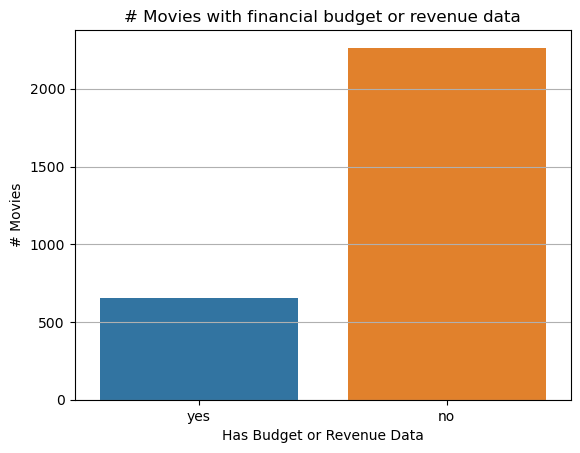

In [11]:
sns.countplot(data = results_combined, x = "finances")

plt.title("# Movies with financial budget or revenue data")
plt.xlabel("Has Budget or Revenue Data")
plt.ylabel("# Movies")
plt.grid(axis = "y")

We can see that a significant portion of the data has neither budget nor revenue information.

In [12]:
#removing rows based off of it has financial data
has_information = results_combined["finances"] == "yes"
results_combined = results_combined[has_information]
results_combined

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,finances
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN,yes
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.110,2162.0,PG,yes
6,tt0119273,0.0,/f5C03doOWiauu37bToKXtpgP5bS.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.048,177.0,R,yes
10,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.172,235.0,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835,tt0867181,0.0,NaN,NaN,5000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,749151.0,en,Patient,...,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Only a miracle can save Sean now,Patient,0.0,0.000,0.0,NaN,yes
2838,tt0956302,0.0,NaN,NaN,200000.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,692814.0,en,Meeting with a Killer,...,47.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Meeting with a Killer,0.0,0.000,0.0,NaN,yes
2841,tt1039952,0.0,/yTGmGjAd0gfpVK0ezoqWgx7AJkp.jpg,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,69399.0,ta,சிட்டிசன்,...,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Citizen,0.0,6.633,15.0,NaN,yes
2861,tt1764172,0.0,NaN,NaN,250000.0,"[{'id': 53, 'name': 'Thriller'}]",NaN,228977.0,en,Among Thieves,...,0.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Among Thieves,0.0,0.000,0.0,NaN,yes


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

Excluding any movies with 0's for budget AND revenue

count plot

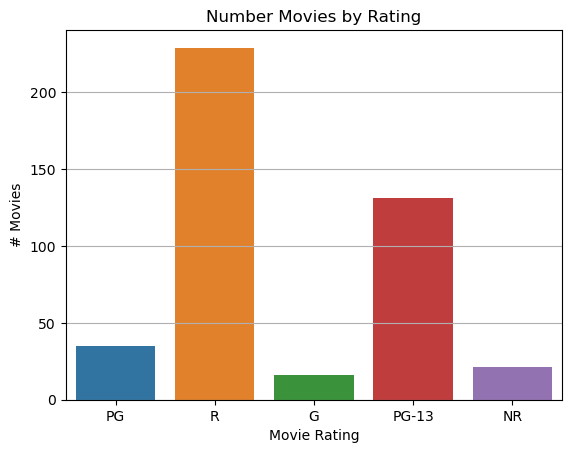

In [13]:
sns.countplot(data = results_combined, x = "certification")

plt.title("Number Movies by Rating")
plt.xlabel("Movie Rating")
plt.ylabel("# Movies")
plt.grid(axis = "y")

We can see that there are over 200 movies rated R, roughly 125 movies rated PG-13, and less than 50 movies rated PG, G, or NR

## What is the average revenue per certification category?

Excluding any movies with 0's for budget AND revenue

bar plot

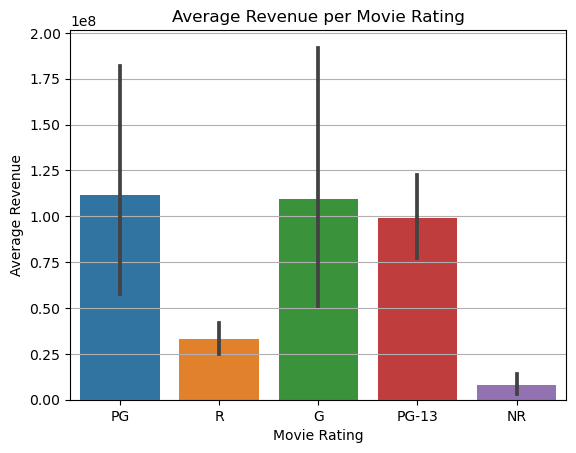

In [14]:
sns.barplot(data = results_combined, x = "certification", y = "revenue")

plt.title("Average Revenue per Movie Rating")
plt.xlabel("Movie Rating")
plt.ylabel("Average Revenue")
plt.grid(axis = "y")

We can see here that movies rated PG, G, and PG-13 all have revenues greater than or equal to 10 million USD.

## What is the average budget per certification category?

Excluding any movies with 0's for budget AND revenue

bar plot

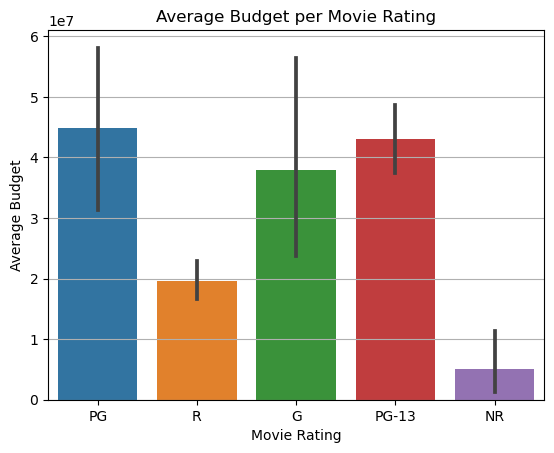

In [15]:
sns.barplot(data = results_combined, x = "certification", y = "budget")

plt.title("Average Budget per Movie Rating")
plt.xlabel("Movie Rating")
plt.ylabel("Average Budget")
plt.grid(axis = "y")

We can see here that the average budget for PG and PG-13 movies is over 4 million USD